**Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO
import seaborn as sns  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

**Read the data from csv**

In [2]:
dummy_df = pd.read_csv("/content/bank.csv", na_values =['NA'])
temp = dummy_df.columns.values
temp

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'deposit'],
      dtype=object)

**Class of Target Variable**

In [3]:
#Target Variable Distirbutions
dummy_df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

**Null-Value Check**

In [4]:
dummy_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

**Data Pre-Processing**

In [5]:
contact_df = dummy_df
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    columns = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome', 'default', 'month', 'deposit']
    encoded_df = pd.DataFrame(res_df[columns].apply(lambda col : le.fit_transform(col)))


    #Concatenating dataframes after encoding 
    res_df.drop(columns=columns, inplace=True)
    res_df = pd.concat((res_df, encoded_df), axis=1)
    return res_df

**Decoding Qualitative Columns**

In [7]:
encoded_df = preprocessor(contact_df)

**Correlation Matrices**

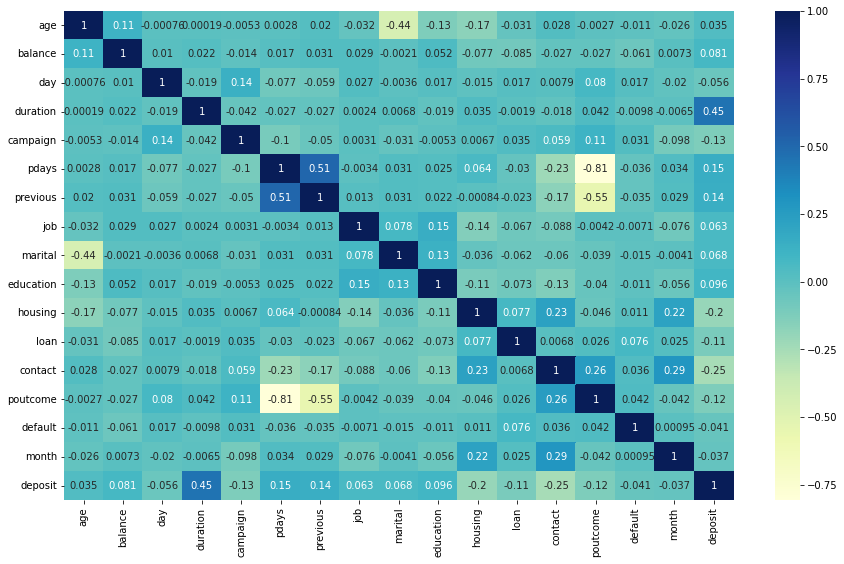

In [8]:
f, ax = plt.subplots(figsize=(15, 9))
ax = sns.heatmap(encoded_df.corr(), annot=True, cmap="YlGnBu")

**Dropping Uncorrelated Variables**

In [9]:
encoded_df.drop(columns=['poutcome'] , inplace=True)
x = encoded_df.drop(['deposit'],axis =1).values
y = encoded_df['deposit'].values

**Split the Dataset into train and test set**

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

print('Shape of training feature:', x_train.shape)
print('Shape of testing feature:', x_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (8929, 15)
Shape of testing feature: (2233, 15)
Shape of training label: (8929,)
Shape of training label: (2233,)


**Build The Decision Tree Model**

In [11]:
# Decision tree with depth = 2
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=2)
model_dt_2.fit(x_train, y_train)
model_dt_2_score_train = model_dt_2.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)
#y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]

Training score:  0.7115018479113002
Testing score:  0.7102552619793999


In [12]:
# Decision tree with depth = 2
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=4)
model_dt_2.fit(x_train, y_train)
model_dt_2_score_train = model_dt_2.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)
#y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]

Training score:  0.779706574084444
Testing score:  0.7756381549484997


**Hyperparameter Tuning**

In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion':['gini'] , 'max_depth': np.arange(6,10), 'min_samples_split' : np.arange(20,40)}
grid_clf_acc = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=10)
grid_clf_acc.fit(x_train, y_train)
print(grid_clf_acc.best_params_)
model_dt_2_score_train = grid_clf_acc.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = grid_clf_acc.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)

{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 38}
Training score:  0.8570948594467466
Testing score:  0.8244514106583072
